In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Step 1: Load and filter the dataset
df = pd.read_parquet("Train.parquet")

In [15]:
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [16]:
target_drug = "Target Drug"
df_target = df[df["Incident"] == target_drug]

In [17]:
df_target

,Patient-Uid,Date,Incident


In [19]:
# Convert the "Date" column to a proper date format
df_target["Date"] = pd.to_datetime(df_target["Date"])

In [20]:
df_target["Date"]

Series([], Name: Date, dtype: datetime64[ns])

In [13]:
# Step 2: Calculate the drop-off rate
df_monthly = df_target.resample("M", on="Date").agg({"Patient-Uid": pd.Series.nunique})
df_monthly["Drop-off Rate"] = df_monthly["Patient-Uid"].diff() / df_monthly["Patient-Uid"].shift()

In [25]:
df_monthly

,Patient-Uid,Drop-off Rate
Date,,


In [26]:
df_monthly["Drop-off Rate"]

Series([], Freq: M, Name: Drop-off Rate, dtype: object)

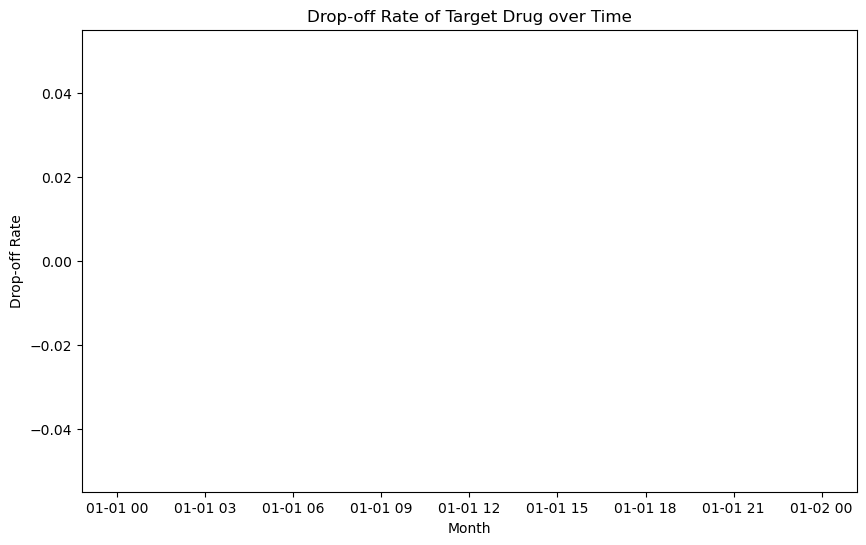

In [28]:
# Step 3: Visualize the drop-off rate
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly["Drop-off Rate"])
plt.xlabel("Month")
plt.ylabel("Drop-off Rate")
plt.title("Drop-off Rate of Target Drug over Time")
plt.show()

In [22]:
# Step 4: Analyze events driving drop-off
events_count = df_target[df_target["Date"].dt.year == df_target["Date"].dt.year.max()]["Incident"].value_counts()

In [23]:
events_count

Series([], Name: Incident, dtype: int64)

In [24]:
# Step 5: Generate insights
print("Events Driving Drop-off:")
print(events_count)

Events Driving Drop-off:
Series([], Name: Incident, dtype: int64)
